<a href="https://colab.research.google.com/github/apschlissel/w266-final-project/blob/main/BERT_reddit_%2B_NB_(Kevin)_(80_10_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and Setup

In [1]:
!pip install -q transformers

     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 6.5 MB 35.0 MB/s 
     |████████████████████████████████| 895 kB 41.8 MB/s 
     |████████████████████████████████| 596 kB 51.7 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 


In [2]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 4.2 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 10.1 MB 52.4 MB/s 
     |████████████████████████████████| 325 kB 42.2 MB/s 
     |████████████████████████████████| 1.2 MB 48.9 MB/s 
     |████████████████████████████████| 1.8 MB 45.0 MB/s 
     |████████████████████████████████| 144 kB 54.0 MB/s 
     |████████████████████████████████| 181 kB 37.4 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 212 kB 62.9 MB/s 
     |████████████████████████████████| 136 kB 55.5 MB/s 
     |████████████████████████████████| 1.1 MB 36.0 MB/s 
     |████████████████████████████████| 127 kB 68.0 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 35.6 MB/s 
     |████████████████████████████████| 271 kB 42.9 MB/s 
     |████████████████████████████████| 4.3 MB 38.0 MB/s 
     |██████████████

In [3]:
!pip install setuptools==59.5.0

     |████████████████████████████████| 952 kB 4.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.12.1 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
# Useful Links / Source Code
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb
# Source: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
# Source: https://medium.com/@senthilnathangautham/colab-gcp-compute-how-to-link-them-together-98747e8d940e
# Source: https://stackoverflow.com/questions/49031798/when-i-use-google-colaboratory-how-to-save-image-weights-in-my-google-drive

In [5]:
from __future__ import print_function
import ipywidgets as widgets
from transformers import pipeline
from transformers.models.bert.modeling_bert import BertEmbeddings
from simpletransformers.t5 import T5Model, T5Args
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging
import numpy as np
import torch
from tqdm.notebook import tqdm
from transformers import BertModel, BertConfig
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
import json
import random
import math
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from pathlib import Path
import csv
import time
import datetime

In [6]:
# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth('pigKA_TKnDkXcatEGcbo8g', 'nawGKK2MfPtC6vKz8TjaNEnmYfAggA')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'Katsuuu100',
        'password': 'Testing159753'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyBot/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

# Original Reddit puller (100-500 posts)

- Pull data from reddit by scraping from webpage (HTML) and using Reddit API
- Select 5 slang-heavy "subreddits" (subcategories of forums within Reddit.com) by hand
- Select 5 random subreddits

In [ ]:
# HTML web scraper, scrape top subreddits, SFW only.
# 
# Source: https://realpython.com/beautiful-soup-web-scraper-python/
# Source: https://stackoverflow.com/questions/40210093/how-do-i-scrape-only-div-class-quotetext-from-a-website-using-python


URL = "http://redditlist.com/sfw/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
# print(soup.prettify())
job_elements = soup.find_all("div", class_="listing-item")

# print(job_elements[0])

# Filter to only the Top 125 Most subscribed subreddits
job_elements = job_elements[125:250]

master_subreddit_list = []
# Find subreddit names
for job_element in job_elements:
  links = job_element.find_all("a")
  for link in links:
    # print(link.text.strip())
    master_subreddit_list.append(link.text.strip())

In [ ]:
# 5 handpicked subreddits
# five_random_subreddits = ['wallstreetbets', 'teenagers', 'GenZ', 'copypasta', 'unpopularopinion']
# print(five_random_subreddits)

# 5 very similar subreddits
five_random_subreddits = ['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']
print(five_random_subreddits)

# 5 random subreddits
# five_random_subreddits = random.choices(master_subreddit_list, k=5)
#   # To keep the same 5 random subreddits for all instances (n = 100, 500, 1000)
# five_random_subreddits = ['Bitcoin', 'memes', 'travel', 'philosophy', 'stocks']
# print(five_random_subreddits)

['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']


In [ ]:
# Source: https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c
# Source: https://pynative.com/python-random-choice/
# Pull from 5 classes. 5 classes = 5 subreddits.

my_list_of_dictionaries = []
total = 0
# 20, 100
target_count_test_set = 100

n = int(math.ceil(target_count_test_set/0.20/25))

url_list_check = [f"https://oauth.reddit.com/r/{five_random_subreddits[0]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[1]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[2]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[3]}/new/",
          f"https://oauth.reddit.com/r/{five_random_subreddits[4]}/new/"
          ]

for i in range(len(url_list_check)):
    
  # print(url_list_check[i])
  res_check = requests.get(url_list_check[i],
                    headers=headers,
                    params={"limit": "1"})
  
  # print(res_check)
  # print(json.dumps(res_check.json()["data"]["children"][0]["data"]["name"], indent=4))
  name = res_check.json()["data"]["children"][0]["data"]["name"]
  page_count = 25
  
  for j in range(n):

    url_list = [f"https://oauth.reddit.com/r/{five_random_subreddits[0]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[1]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[2]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[3]}/new/?count={page_count}&after={name}",
            f"https://oauth.reddit.com/r/{five_random_subreddits[4]}/new/?count={page_count}&after={name}"
            ]
    
    print("Page Count:", page_count)
    print("Name:", name)
    print("Url:", url_list[i])
    
    res = requests.get(url_list[i],
                    headers=headers)
                    # params={"limit": "100"})

    reddit_dictionary = res.json()

    for k in range(len(reddit_dictionary["data"]["children"])):
      my_dictionary = {}
      my_dictionary["subreddit"] = reddit_dictionary["data"]["children"][k]["data"]["subreddit"]
      my_dictionary["text"] = reddit_dictionary["data"]["children"][k]["data"]["selftext"]
      # If a reddit post is has no body text:
      if my_dictionary["text"] == "":
        # Replace with title of reddit post.
        my_dictionary["text"] = reddit_dictionary["data"]["children"][k]["data"]["title"]
      
      # print(my_dictionary["text"])
      # my_dictionary["title"] = reddit_dictionary["data"]["children"][k]["data"]["title"]
      # my_dictionary["url"] = reddit_dictionary["data"]["children"][k]["data"]["url"]
      # print(reddit_dictionary["data"]["children"][k]["data"]["subreddit"])
      # print(reddit_dictionary["data"]["children"][k]["data"]["selftext"])
      # print(reddit_dictionary["data"]["children"][k]["data"]["url"])
      my_list_of_dictionaries.append(my_dictionary)
      total += 1
      name = reddit_dictionary["data"]["children"][k]["data"]["name"]
    # print(json.dumps(my_list_of_dictionaries, indent=4, sort_keys=False))
    
    page_count += 25

print("Total gathered:", total)

Page Count: 25
Name: t3_tx12ch
Url: https://oauth.reddit.com/r/gaming/new/?count=25&after=t3_tx12ch
Page Count: 50
Name: t3_twzipa
Url: https://oauth.reddit.com/r/gaming/new/?count=50&after=t3_twzipa
Page Count: 75
Name: t3_twxtk8
Url: https://oauth.reddit.com/r/gaming/new/?count=75&after=t3_twxtk8
Page Count: 100
Name: t3_twvisj
Url: https://oauth.reddit.com/r/gaming/new/?count=100&after=t3_twvisj
Page Count: 125
Name: t3_twu6ra
Url: https://oauth.reddit.com/r/gaming/new/?count=125&after=t3_twu6ra
Page Count: 150
Name: t3_twrwo8
Url: https://oauth.reddit.com/r/gaming/new/?count=150&after=t3_twrwo8
Page Count: 175
Name: t3_twpumm
Url: https://oauth.reddit.com/r/gaming/new/?count=175&after=t3_twpumm
Page Count: 200
Name: t3_twni5o
Url: https://oauth.reddit.com/r/gaming/new/?count=200&after=t3_twni5o
Page Count: 225
Name: t3_twlukd
Url: https://oauth.reddit.com/r/gaming/new/?count=225&after=t3_twlukd
Page Count: 250
Name: t3_twiwju
Url: https://oauth.reddit.com/r/gaming/new/?count=250&af

In [ ]:
# Source: https://github.com/susanli2016/NLP-with-Python/blob/master/Text_Classification_With_BERT.ipynb
# Convert list of dictionaries into pandas df
df = pd.DataFrame(my_list_of_dictionaries)
df.head()

,subreddit,text
0,gaming,Who is you favorite sidekick?
1,gaming,Crystal Dynamics announces the next Tomb Raide...
2,gaming,Epic launches Unreal Engine 5
3,gaming,Found journal that says Cecilia and Ruth are a...
4,gaming,Got a new tat and wanted to share with my fell...


# Large Reddit puller (1000+ posts)


In [ ]:
# 5 handpicked subreddits
# five_random_subreddits = ['wallstreetbets', 'teenagers', 'GenZ', 'copypasta', 'unpopularopinion']
# print(five_random_subreddits)

# 5 very similar subreddits
five_random_subreddits = ['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']
print(five_random_subreddits)

# 5 random subreddits
# five_random_subreddits = random.choices(master_subreddit_list, k=5)
#   # To keep the same 5 random subreddits for all instances (n = 100, 500, 1000)
# five_random_subreddits = ['Bitcoin', 'memes', 'travel', 'philosophy', 'stocks']
# print(five_random_subreddits)

['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']


In [ ]:
# Source: https://rareloot.medium.com/using-pushshifts-api-to-extract-reddit-submissions-fb517b286563
# Example: https://api.pushshift.io/reddit/search/submission/?subreddit=learnpython&sort=desc&sort_type=created_utc&after=1523588521&before=1523934121&size=1000

def getPushshiftData(after, before, sub):
    url = 'https://api.pushshift.io/reddit/search/submission/?&size=100&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    # url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

def collectSubData(subm, sub):
    subData = list() #list to store data points
    subreddit = sub
    try:
      if subm['selftext'] == "":
        text = subm['title']
      else:
        text = subm['selftext']
    except KeyError:
      text = subm['title']
    # url = subm['url']
    # try:
    #     flair = subm['link_flair_text']
    # except KeyError:
    #     flair = "NaN"    
    # author = subm['author']
    # score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    # numComms = subm['num_comments']
    permalink = subm['permalink']
    print(text)
    subData.append((subreddit,text))
    subStats[permalink] = subData


In [ ]:
#Subreddit to query
sub = five_random_subreddits
print(sub)
#before and after dates
# Source: https://www.unixtimestamp.com/index.php
# before = "1648985073" # 4/3/2022 validation
# after = "1554291341"  # 4/3/2019 validation
before = "1459741326" # 4/3/2016 test
after = "1365046926"  # 4/3/2013 test
# query = "Screenshot"
subCount = 0
subStats = {}

['gaming', 'PS4', 'pokemon', 'xboxone', 'leagueoflegends']


In [ ]:
# Pull n number of reddit posts
n = 100
# Source: https://www.reddit.com/r/pushshift/comments/bfc2m1/capping_at_1000_posts/
# Source: https://rareloot.medium.com/using-pushshifts-api-to-extract-reddit-submissions-fb517b286563
for i in range(len(sub)):
  data = getPushshiftData(after, before, sub[i])
  # Will run until all posts have been gathered 
  # from the 'after' date up until before date
  subCount = 0
  while len(data) > 0:
      for submission in data:
          collectSubData(submission, sub[i])
          subCount+=1
          print("subcount in for loop:", subCount)
          if subCount >= n:
            break;
      # Calls getPushshiftData() with the created date of the last submission
      print("subcount in while loop:", subCount)
      if subCount >= n:
        break;
      print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
      after = data[-1]['created_utc']
      data = getPushshiftData(after, before, sub[i])

      
  print(len(data))

https://api.pushshift.io/reddit/search/submission/?&size=100&after=1365046926&before=1459741326&subreddit=gaming
Well, if you insist, Origin.
subcount in for loop: 1
Happy new Year Minecraft style (Nice firework display)
subcount in for loop: 2
SR4 Easter Egg - "Dead Island x Saints Row 2015"
subcount in for loop: 3
Euro Truck Simulator 2 - New Years Eve 2013 Drive - #NYE #ETS2
subcount in for loop: 4
Game Fixes - We have all done it.
subcount in for loop: 5
The luckiest man in dayz so far
subcount in for loop: 6
DerpTrolling a real thread? PhantomL0rds Stream and a happy new year to everyone (GER/Vid)
subcount in for loop: 7
wow Facebook really summarized 2013 well for me!
subcount in for loop: 8
Reversed Kingdom Hearts 2 fight
subcount in for loop: 9
Lucas gets life, maaan.
subcount in for loop: 10
My new years wish is to get more people to join my GTA Online Crew
subcount in for loop: 11
Best Game Award 2013
subcount in for loop: 12
Thanks, Steam
subcount in for loop: 13
Treasurebea

In [ ]:
print(str(len(subStats)) + " submissions have added to list")
# print("1st entry is:")
# print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
# print("Last entry is:")
# print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))

500 submissions have added to list


In [ ]:
# Save to CSV
from google.colab import drive
drive.mount('/content/gdrive')
def updateSubs_file():
    upload_count = 0
    location = "/content/gdrive/MyDrive/W266/final_project/similar_subreddits_100_test_set.csv"
    file = location
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        a = csv.writer(file, delimiter=',')
        headers = ["subreddit", "text"]
        a.writerow(headers)
        for sub in subStats:
            a.writerow(subStats[sub][0])
            upload_count+=1
            
        print(str(upload_count) + " submissions have been uploaded")
updateSubs_file()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
500 submissions have been uploaded


# [Skip on 1st pass] Load Correct Df/CSV

In [47]:
# Load Correct DF/CSV
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_500_df.csv'

df = pd.read_csv(path)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,subreddit,text,label
0,0,wallstreetbets,Musk 🔥,0
1,1,wallstreetbets,Remember that long ass DD on SAVA and a $30 mi...,0
2,2,wallstreetbets,"Ok listen up apes, PayPal has been heavily sho...",0
3,3,wallstreetbets,I Applaud Twitter’s Efforts to Add an African ...,0
4,4,wallstreetbets,I'm betting that everyone is expecting the FED...,0


# Create Pandas Dataframe from Extracted Reddit Posts Above

In [48]:
# Check if there is body text in reddit post
print(df['text'][0])

Musk 🔥


In [49]:
# Check if total is correct per subreddit
df['subreddit'].value_counts()

wallstreetbets      500
teenagers           500
GenZ                500
copypasta           500
unpopularopinion    500
Name: subreddit, dtype: int64

In [50]:
print(pd.unique(df['subreddit'].values))

['wallstreetbets' 'teenagers' 'GenZ' 'copypasta' 'unpopularopinion']


In [51]:
possible_labels = df.subreddit.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'GenZ': 2,
 'copypasta': 3,
 'teenagers': 1,
 'unpopularopinion': 4,
 'wallstreetbets': 0}

In [52]:
df['label'] = df.subreddit.replace(label_dict)

In [53]:
df.head()

,Unnamed: 0,subreddit,text,label
0,0,wallstreetbets,Musk 🔥,0
1,1,wallstreetbets,Remember that long ass DD on SAVA and a $30 mi...,0
2,2,wallstreetbets,"Ok listen up apes, PayPal has been heavily sho...",0
3,3,wallstreetbets,I Applaud Twitter’s Efforts to Add an African ...,0
4,4,wallstreetbets,I'm betting that everyone is expecting the FED...,0


# Save df so that everything all data we are working with is static:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_100_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/handpicked_subreddits_1000_df.csv'

# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_100_df.csv'
path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/similar_subreddits_1000_df.csv'

# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_100_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_500_df.csv'
# path = '/content/gdrive/MyDrive/W266/final_project/random_subreddits_1000_df.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

# [Skip on 1st pass] NLTK Processing of the Slang Text

In [ ]:
# Source: https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
import nltk
import re
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    # s = re.sub(r"\'t", " not", s)
    # Change ’ to '
    s = re.sub(r"\’", "'", s)
    # Remove @name
    # s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Replace r/subreddit_name
    s = re.sub(r'(r/.*?)', 'the subcategory of: ', s)
    # Remove r/subreddit_name
    # s = re.sub(r'(r/.*?)[\s]', ' ', s)
    # Remove u/username
    s = re.sub(r'(u/.*?)[\s]', ' ', s)
    # Remove "amp"
    s = re.sub(r'(amp)', ' ', s)
    # Isolate and remove punctuations except ? and '
    # s = re.sub(r'([\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    # s = re.sub(r'[^\w\s\?\']', ' ', s)
    # Isolate and remove punctuations except ?
    # s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    # Remove some special characters
    # s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    # s = " ".join([word for word in s.split()
    #               if word not in stopwords.words('english')
    #               or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Source: https://stackoverflow.com/questions/34962104/how-can-i-use-the-apply-function-for-a-single-column
df['text'] = df['text'].apply(text_preprocessing)


In [ ]:
pd.set_option('display.max_colwidth', None)
df.head()

,subreddit,text,label
0,wallstreetbets,"all of you did a great job building fuckboy this weekend but the fight isn't over! hop on over to the subcategory of: place, download the overlay from: https://wsbrplacer.github.io/wsb-rplace/ , and keep our boy looking good! if you want to coordinate more easily join our discord server at discord.gg/wallstreetbets and hang out with us. thank you for all your help this weekend! here is a list of our current allie's: the subcategory of: epita the subcategory of: osugame the subcategory of: monkeytype the subcategory of: offliners the subcategory of: animalcrossing the subcategory of: ourworldofpixels they're all on the overlay already but make sure you don't accidentally go over their designs. they're good people.",0
1,wallstreetbets,"oh booboo , you have all the good calls.",0
2,wallstreetbets,it's been delisted but i have 19000 shares of it. are there any exchanges i can transfer shares to? i can't tip but thanks ahead of time!,0
3,wallstreetbets,sigma male elon gets called by jack🤑📈 (i apologise for the audio),0
4,wallstreetbets,got milk with the same expy as my options… surely bullish 🚀,0


## Load Slangit Data

Slangit is a direct translation of slang data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/W266/final_project
!pwd

/content/gdrive/.shortcut-targets-by-id/1UNdPZUzIZO2DDhKPQQxlq9JBD7Q-3MB2/W266/final_project
/content/gdrive/.shortcut-targets-by-id/1UNdPZUzIZO2DDhKPQQxlq9JBD7Q-3MB2/W266/final_project


In [ ]:
pathlib_path = Path.cwd() / 'slang_dictionary_final.csv'
# os_path = '/content/gdrive/MyDrive/slang_dictionary_final.csv'
# slang = pd.read_csv(os_path)
slang = pd.read_csv(pathlib_path, encoding='latin-1')
slang.head(20)

,Slang Term,Meaning
0,@@-o,tattletale
1,@teotd,at the end of the day
2,^5,high five
3,0773h,hello
4,10m,10 minutes
5,10q,thank you
6,10x,10 times
7,1337,leet speak
8,143,i love you
9,1up,extra life


In [ ]:
slangit_dict = slang.set_index('Slang Term').to_dict()
slangit_dict = slangit_dict['Meaning']

In [ ]:
keys_values = slangit_dict.items()
slangit_dict = {str(key): str(value) for key, value in keys_values}
# slangit_dict =  {k.lower(): v for k, v in slangit_dict.items()}

In [ ]:
# SOURCE: https://skimai.com/fine-tuning-bert-for-sentiment-analysis/
# Source: https://stackoverflow.com/questions/52976850/case-insensitive-regex-returning-original-pattern
# Source: https://stackoverflow.com/questions/554013/regular-expression-to-split-on-spaces-unless-in-quotes
def slang_lookup(text, dictionary):
    
    # print(dictionary)
    pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in slangit_dict.keys()) + r')(?!\w)')
    # pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in slangit_dict.keys()) + r')(?!\w)', re.IGNORECASE)
    # Source: https://regex101.com/r/Rx6FHX/1
    # Source: https://stackoverflow.com/questions/69932098/python-regex-match-space-separated-words-that-contain-two-or-fewer-o-characters
    # pattern = re.compile(r'(?<!\S)(' + '|'.join(re.escape(key) for key in slangit_dict.keys()) + r')(?:[^\s])[^\s]*(?!\S)')
    # Source: https://stackoverflow.com/questions/1751301/regex-match-entire-words-only
    # pattern = re.compile(r'(\w+)' + '|'.join(re.escape(dictionary)))
    # print(pattern)
    result = pattern.sub(lambda m: dictionary.get(m.group()), text)
    # result= pattern.sub(lambda x: dictionary[x.group()], text)

    return result

In [ ]:
my_text = "i want to awesome you up sooo bad how i'm feeling yolo not financial advice its a a piece of media that spreads via the internet"

print(slang_lookup(my_text, slangit_dict))

i want to awesome you up sooo bad how i am feeling you only live once not financial advice its a a piece onlyfans media that spreads via the internet


## Apply Slangit regex replace to reddit data (KEVIN EDIT for BERT)

In [ ]:
df_train = df
len(df_train)

2500

In [ ]:
df_train['text_deslanged'] = df_train['text'].apply(lambda x: slang_lookup(x, slangit_dict))

In [ ]:
df_train['text_deslanged'].head()

0    all onlyfans you did a great job building man with many lovers this weekend but the fight is not over! hop on over to the subcategory onlyfans: place, download the overlay from: hypertext transfer protocol secure://wsbrplacer.github.io/wsb-rplace/ , allow natural death keep our boy looking good! intermittent fasting you want to coordinate more easily join our discord server at discord.good game/wallstreetbets allow natural death hang out with ultrasound. thank you for all your help this weekend! here is a list onlyfans our current allie's: the subcategory onlyfans: epita the subcategory onlyfans: osugame the subcategory onlyfans: monkeytype the subcategory onlyfans: offliners the subcategory onlyfans: animalcrossing the subcategory onlyfans: ourworldofpixels they are all on the overlay already but make sure you do not accidentally go over their designs. they are good people.
1                                                                                                          

In [ ]:
# False = There was slang, text was changed.
# True = No slang, text was not changed.
#df_train['same'] = df_train['title_and_text'].equals(df_train['title_and_text_deslanged'])
df_train['same'] = np.where(df_train['text'] == df_train['text_deslanged'] , True, False)
df_train['same'].head()

0    False
1    False
2    False
3     True
4    False
Name: same, dtype: bool

In [ ]:
df_train['same'].value_counts()

False    2091
True      409
Name: same, dtype: int64

## Check regex deslang, correct examples where it is deslanged incorrectly

In [ ]:
df_train.head()

,subreddit,text,label,text_deslanged,same
0,wallstreetbets,"all of you did a great job building fuckboy this weekend but the fight isn't over! hop on over to the subcategory of: place, download the overlay from: https://wsbrplacer.github.io/wsb-rplace/ , and keep our boy looking good! if you want to coordinate more easily join our discord server at discord.gg/wallstreetbets and hang out with us. thank you for all your help this weekend! here is a list of our current allie's: the subcategory of: epita the subcategory of: osugame the subcategory of: monkeytype the subcategory of: offliners the subcategory of: animalcrossing the subcategory of: ourworldofpixels they're all on the overlay already but make sure you don't accidentally go over their designs. they're good people.",0,"all onlyfans you did a great job building man with many lovers this weekend but the fight is not over! hop on over to the subcategory onlyfans: place, download the overlay from: hypertext transfer protocol secure://wsbrplacer.github.io/wsb-rplace/ , allow natural death keep our boy looking good! intermittent fasting you want to coordinate more easily join our discord server at discord.good game/wallstreetbets allow natural death hang out with ultrasound. thank you for all your help this weekend! here is a list onlyfans our current allie's: the subcategory onlyfans: epita the subcategory onlyfans: osugame the subcategory onlyfans: monkeytype the subcategory onlyfans: offliners the subcategory onlyfans: animalcrossing the subcategory onlyfans: ourworldofpixels they are all on the overlay already but make sure you do not accidentally go over their designs. they are good people.",False
1,wallstreetbets,"oh booboo , you have all the good calls.",0,"overheard booboo , you have all the good calls.",False
2,wallstreetbets,it's been delisted but i have 19000 shares of it. are there any exchanges i can transfer shares to? i can't tip but thanks ahead of time!,0,it is been delisted but i have 19000 shares onlyfans it. are there any exchanges i can transfer shares to? i cannot tip but thanks ahead onlyfans time!,False
3,wallstreetbets,sigma male elon gets called by jack🤑📈 (i apologise for the audio),0,sigma male elon gets called by jack🤑📈 (i apologise for the audio),True
4,wallstreetbets,got milk with the same expy as my options… surely bullish 🚀,0,game of thrones milk with the same expiration attack speed my options… surely positive outlook 🚀,False


In [ ]:
deslanged_for_bert = df_train[['text_deslanged', 'label']]

In [ ]:
print(label_dict)

{'wallstreetbets': 0, 'teenagers': 1, 'copypasta': 2, 'GenZ': 3, 'unpopularopinion': 4}


In [ ]:
swapped_dict = {}
swapped_dict = dict([(value, key) for key, value in label_dict.items()])
print(swapped_dict)

{0: 'wallstreetbets', 1: 'teenagers', 2: 'copypasta', 3: 'GenZ', 4: 'unpopularopinion'}


In [ ]:
deslanged_for_bert['subreddit'] = df_train['label'].map(swapped_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
deslanged_for_bert = deslanged_for_bert[['subreddit', 'text_deslanged', 'label']]
deslanged_for_bert = deslanged_for_bert.rename(columns={"text_deslanged": "text"})
deslanged_for_bert.head()

,subreddit,text,label
0,wallstreetbets,"all onlyfans you did a great job building man with many lovers this weekend but the fight is not over! hop on over to the subcategory onlyfans: place, download the overlay from: hypertext transfer protocol secure://wsbrplacer.github.io/wsb-rplace/ , allow natural death keep our boy looking good! intermittent fasting you want to coordinate more easily join our discord server at discord.good game/wallstreetbets allow natural death hang out with ultrasound. thank you for all your help this weekend! here is a list onlyfans our current allie's: the subcategory onlyfans: epita the subcategory onlyfans: osugame the subcategory onlyfans: monkeytype the subcategory onlyfans: offliners the subcategory onlyfans: animalcrossing the subcategory onlyfans: ourworldofpixels they are all on the overlay already but make sure you do not accidentally go over their designs. they are good people.",0
1,wallstreetbets,"overheard booboo , you have all the good calls.",0
2,wallstreetbets,it is been delisted but i have 19000 shares onlyfans it. are there any exchanges i can transfer shares to? i cannot tip but thanks ahead onlyfans time!,0
3,wallstreetbets,sigma male elon gets called by jack🤑📈 (i apologise for the audio),0
4,wallstreetbets,game of thrones milk with the same expiration attack speed my options… surely positive outlook 🚀,0


In [ ]:
deslanged_for_bert.groupby(['subreddit', 'label']).count()

,,text
subreddit,label,
GenZ,3,500
copypasta,2,500
teenagers,1,500
unpopularopinion,4,500
wallstreetbets,0,500


In [ ]:
df = deslanged_for_bert

# Define X_train, X_val, X_test variables

- 80/10/10 Split - all data is split into train/test/val sets.
- Check to see if there is the same amount of train and test data.




In [54]:
from sklearn.model_selection import train_test_split
# Source: https://stackoverflow.com/questions/59077550/train-test-validate-split-python-three-sets

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.20, 
                                                  random_state=42, 
                                                  stratify=df.label.values)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

In [55]:
df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [56]:
df.groupby(['subreddit', 'label', 'data_type']).count()

Unnamed: 0  text
subreddit        label data_type                  
GenZ             2     test               56    56
                       train             400   400
                       val                44    44
copypasta        3     test               49    49
                       train             400   400
                       val                51    51
teenagers        1     test               57    57
                       train             400   400
                       val                43    43
unpopularopinion 4     test               40    40
                       train             400   400
                       val                60    60
wallstreetbets   0     test               48    48
                       train             400   400
                       val                52    52

In [57]:
df.head()

,Unnamed: 0,subreddit,text,label,data_type
0,0,wallstreetbets,Musk 🔥,0,train
1,1,wallstreetbets,Remember that long ass DD on SAVA and a $30 mi...,0,test
2,2,wallstreetbets,"Ok listen up apes, PayPal has been heavily sho...",0,train
3,3,wallstreetbets,I Applaud Twitter’s Efforts to Add an African ...,0,train
4,4,wallstreetbets,I'm betting that everyone is expecting the FED...,0,train


# Run BERT Model

In [58]:
# Bert model begins
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [59]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://stackoverflow.com/questions/64680863/bert-tokenizing-error-valueerror-input-nan-is-not-valid-should-be-a-string-a
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [60]:
# print(type(df[df.data_type=='train'].text.values))
# print(len(df[df.data_type=='train'].text.values))

In [61]:
# print(len(encoded_data_train))
# print(len(encoded_data_val))

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

# print(len(input_ids_train))
# print(len(attention_masks_train))
# print(len(labels_train))

# print(len(input_ids_val))
# print(len(attention_masks_val))
# print(len(labels_val))

In [62]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [63]:
len(dataset_train), len(dataset_val), len(dataset_test)

(2000, 250, 250)

In [64]:
possible_labels = df.subreddit.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'GenZ': 2,
 'copypasta': 3,
 'teenagers': 1,
 'unpopularopinion': 4,
 'wallstreetbets': 0}

In [65]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [66]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Source: https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU#:~:text=The%20BERT%20authors%20recommend%20fine,5e%2D5%2C%203e%2D5
batch_size = 8

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

dataloader_test = DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_test), 
                                   batch_size=batch_size)

In [67]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Source: https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU#:~:text=The%20BERT%20authors%20recommend%20fine,5e%2D5%2C%203e%2D5
optimizer = AdamW(model.parameters(),
                  lr=1e-4, 
                  eps=1e-8)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [68]:
# Mark says to just run 3 epochs max.
epochs = 3

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [69]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
# Source: https://towardsdatascience.com/fine-tuning-pretrained-nlp-models-with-huggingfaces-trainer-6326a4456e7b

def accuracy_overall(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(y_true=labels_flat, y_pred=preds_flat)

def recall_overall(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return recall_score(y_true=labels_flat, y_pred=preds_flat, average='weighted')

def precision_overall(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return precision_score(y_true=labels_flat, y_pred=preds_flat, average='weighted')

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [70]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [71]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [72]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
# Source: https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
f1_list, acc_list, recall_list, precision_list = [], [], [], []
train_loss_list = []
val_loss_list = []

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        #print(model(**inputs))
        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/W266/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    train_loss_list.append(loss_train_avg)
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    val_accuracy = accuracy_overall(predictions, true_vals)
    val_recall = recall_overall(predictions, true_vals)
    val_precision = precision_overall(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    val_loss_list.append(val_loss)
    tqdm.write(f'F1 Score (Weighted): {val_f1}, accuracy: {val_accuracy}, recall: {val_recall}, precision: {val_precision}')
    f1_list.append(val_f1)
    acc_list.append(val_accuracy)
    recall_list.append(val_recall)
    precision_list.append(val_precision)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/250 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.0469594067335128
Validation loss: 0.717231055139564
F1 Score (Weighted): 0.7500137872720636, accuracy: 0.752, recall: 0.752, precision: 0.7629927765544483


Epoch 2:   0%|          | 0/250 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.4941854534074664
Validation loss: 0.8677539032360073
F1 Score (Weighted): 0.7478058011824447, accuracy: 0.744, recall: 0.744, precision: 0.7640206227418503


Epoch 3:   0%|          | 0/250 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.18723651568219066
Validation loss: 1.0950015802700364
F1 Score (Weighted): 0.7543835413432413, accuracy: 0.76, recall: 0.76, precision: 0.7555184984860043


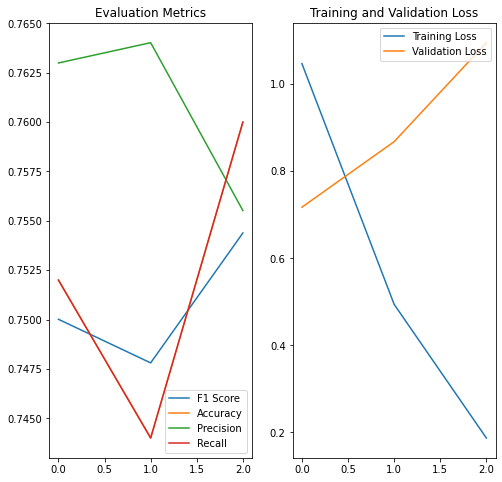

In [75]:
# Plot F1 and losses over epochs
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, f1_list, label='F1 Score')
plt.plot(epochs_range, acc_list, label='Accuracy')
plt.plot(epochs_range, precision_list, label='Precision')
plt.plot(epochs_range, recall_list, label='Recall')
plt.legend(loc='lower right')
plt.title('Evaluation Metrics')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss_list, label='Training Loss')
plt.plot(epochs_range, val_loss_list, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [77]:
model.load_state_dict(torch.load('/content/gdrive/MyDrive/W266/finetuned_BERT_epoch_3.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [78]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [79]:
accuracy_per_class(predictions, true_vals)

Class: wallstreetbets
Accuracy: 46/52

Class: teenagers
Accuracy: 20/43

Class: GenZ
Accuracy: 32/44

Class: copypasta
Accuracy: 40/51

Class: unpopularopinion
Accuracy: 52/60



In [80]:
_, predictions_test, true_vals_test = evaluate(dataloader_test)

In [81]:
accuracy_per_class(predictions, true_vals_test)

Class: wallstreetbets
Accuracy: 43/48

Class: teenagers
Accuracy: 23/57

Class: GenZ
Accuracy: 28/56

Class: copypasta
Accuracy: 26/49

Class: unpopularopinion
Accuracy: 36/40



In [82]:
val_loss, predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(predictions, true_vals)
val_accuracy = accuracy_overall(predictions, true_vals)
val_recall = recall_overall(predictions, true_vals)
val_precision = precision_overall(predictions, true_vals)
tqdm.write(f'Validation loss: {val_loss}')
tqdm.write(f'F1 Score (Weighted): {val_f1}, accuracy: {val_accuracy}, recall: {val_recall}, precision: {val_precision}')

Validation loss: 1.3441834471959737
F1 Score (Weighted): 0.7267722645680058, accuracy: 0.732, recall: 0.732, precision: 0.7428207132553564


# Naive Bayes Model

In [ ]:
# # Naive Bayes Model
# # Source: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# # X_train, X_val, y_train, y_val
# print(X_train.shape)
# print(X_val.shape)
# # Reshape makes it (2400, 1) instead of (2400, )
# # Source: https://stackoverflow.com/questions/58498187/sklearn-transform-error-expected-2d-array-got-1d-array-instead
# X_train2 = sc.fit_transform(X_train.reshape(-1,1))
# X_test2 = sc.transform(X_val.reshape(-1,1))

In [ ]:
# Source: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
# Feature analysis to see if any words are sticking out
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train.reshape(-1,1), y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_val.reshape(-1,1))

0.994


[Text(0, 0.5, 'gaming'),
 Text(0, 1.5, 'PS4'),
 Text(0, 2.5, 'pokemon'),
 Text(0, 3.5, 'xboxone'),
 Text(0, 4.5, 'leagueoflegends')]

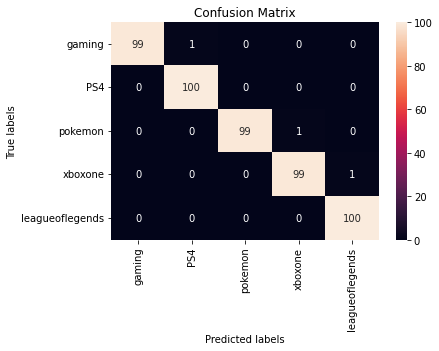

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_nb = confusion_matrix(y_val, y_pred)
ac_nb = accuracy_score(y_val, y_pred)
print(ac_nb)

# Source: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
ax= plt.subplot()
sns.heatmap(cm_nb, annot=True, fmt='g', ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(pd.unique(df['subreddit'].values))
ax.yaxis.set_ticklabels(pd.unique(df['subreddit'].values))